# Contexto ✒️

Notebook voltado ao estudo das seleções das variáveis presentes no dataframe, buscando compreender quais são as features ( variáveis explicativas ) significativas que conseguem explicar a variável target, visando reduzir a dimensionalidade dos dados e, possivelmente, a colinearidade existente.

O estudo se debruça a um estudo de caso acerca de reservas de hóteis para um hotel fictício, por meio das quais objetiva-se criar um modelo que consiga prever, com base nas variáveis explicativas, a possibilidade de pessoas manterem ou não a sua reserva no hotel.

O conjunto de dados presentes referentes aos dados dos clientes apresenta alta dimensionalidade, de modo que, para realizar o modelo, bem como compreender quais são as variáveis significativas que conseguem explicar a manuntenção ou não da reserva será necessário a seleção das features.

## Biblioteca 📚

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix


## Dataframe 💾

In [ ]:
df = pd.read_csv('/content/hotel.csv')

### Analisando a condição do dataframe

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1


In [ ]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status'],
      dtype='object')

In [ ]:
df.shape

(34146, 31)

In [ ]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
type_of_meal_plan_Meal Plan 1           0
type_of_meal_plan_Meal Plan 2           0
type_of_meal_plan_Meal Plan 3           0
type_of_meal_plan_Not Selected          0
room_type_reserved_Room_Type 1          0
room_type_reserved_Room_Type 2          0
room_type_reserved_Room_Type 3          0
room_type_reserved_Room_Type 4          0
room_type_reserved_Room_Type 5          0
room_type_reserved_Room_Type 6    

In [ ]:
duplicados = df.duplicated().sum()
duplicados

9669

In [ ]:
print(f'Proporção dos dados duplicados no modelo {(duplicados / df.shape[0]).round(2)}')

Proporção dos dados duplicados no modelo 0.28


In [ ]:
# Removendo as colunas duplicadas :

df = df.drop_duplicates()

## Criação de um baseline

Parte relacionada a criar um modelo de baseline para identificar no primeiro momento como o modelo de machine learning está desempenhando a partir do conjunto de dados presentes.

A principal diferença nessa etapa em relação ao o que é comumente adotado é que criarei tanto um Dummy Classifier, um modelo de baseline em essência, quanto um Random Forest, cujo objetivo principal é de compreender o seu desempenho mediante aos dados em sua alta dimensionalidade. No primeiro momento, o Random Forest não será muito complexo, passando a ele apenas uma quantidade máxima de estimadores ( as árvores, a profundidade máxima dessas e o estado de aleatorização ).

Nesse sentido, para tanto, irei separar os dados em features e target ( a variável resposta da análise ), dividindo posteriormente  numa porção para treino e teste.

In [ ]:
SEED = 22

In [ ]:
# Dividindo em features e target :

X = df.drop('booking_status', axis = 1)
y = df['booking_status']

In [ ]:
# Verificando a proporção da variável target :

pd.DataFrame(df['booking_status'].value_counts())

,count
booking_status,
0,13470
1,11007


In [ ]:
proporção = round((11007 / 12470), 2)
print(f'Proporção dos clientes que fazem a reserva em relação aos que não a fazem : {proporção}')

Proporção dos clientes que fazem a reserva em relação aos que não a fazem : 0.88


Segundo essa proporção e a visualização na tabela é possível compreender que por mais que os dados não estejam estritamente balanceados na forma 1 : 1, na forma em que uma não reserva equivale a uma reserva, os dados referentes a variável target não estão desproporcionais, o que não exige uma etapa de pré-processamento dos dados relativa ao balanceamento dos dados.

In [ ]:
# Dividindo em treino e teste :

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y, random_state = SEED)

### Etendendo o hiperparâmetro stratify 💭

O *stratify* é utilizado na etapa de separação dos dados na porção treino e teste de modo a garantir que tal divisão seja estratificada seguindo as proporções dos dados na variável targer. A utilização de tal recurso é especialmente útil quando se está lidando com dados desbalanceados, como no presente caso, ainda que ele não seja extremo. Desse modo, em cenários nos quais os dados estão perfeitamente balanceados, a utilização do *stratify* seria desnecessário.

## Dummy Classifier 🤡

In [ ]:
dummy = DummyClassifier(random_state = SEED)

## Random Forest 🌳🌳

In [ ]:
# Hiperparâmetros do modelo :

max_depth = 10

# Instanciando o modelo no primeiro momento apenas
# informando a profundidade máxima de cada árvore,
# a quantidade de árvores e o estado de aleatorização,
# por meio do SEED, que garante a reprodutibilidade do
# modelo.

random_forest = RandomForestClassifier( n_estimators = 200, max_depth = max_depth,
                                random_state = SEED)

In [ ]:
# Criando uma função que treina o modelo passado
# aos dados presentes e o aplica, buscando a sua predição,
# além de executar métricas de avaliação para podê-lo avaliar.

def avaliaModelos(nome_modelo, modelo):

  modelo.fit(X_train, y_train)
  y_predict = modelo.predict(X_test)

  acuracia = accuracy_score(y_test, y_predict).round(2)
  precisao = precision_score(y_test, y_predict).round(2)
  recall = recall_score(y_test, y_predict).round(2)
  f1 = f1_score(y_test, y_predict).round(2)

  print(f'\n{nome_modelo} :\n')
  print(f'Acurácia do {nome_modelo} : {(acuracia)} ')
  print(f'Precisão do {nome_modelo} : {(precisao)} ')
  print(f'Revocação do {nome_modelo} : {(recall)} ')
  print(f'F1-Score do {nome_modelo} : {(f1)} ')



In [ ]:
# Lista que compreende os modelos utilizados :

modelos = [
    ('Dummy Classifier', dummy),
     ('Random Forest', random_forest)
]

# Iterando pelos modelos e os avaliando :

for nome_modelo, modelo in modelos:
  avaliaModelos(nome_modelo, modelo)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Dummy Classifier :

Acurácia do Dummy Classifier : 0.55 
Precisão do Dummy Classifier : 0.0 
Revocação do Dummy Classifier : 0.0 
F1-Score do Dummy Classifier : 0.0 

Random Forest :

Acurácia do Random Forest : 0.86 
Precisão do Random Forest : 0.86 
Revocação do Random Forest : 0.83 
F1-Score do Random Forest : 0.84 


## Visualizando a contribuição das features em relação à target 🔬

Uma das formas de realizar a contribuição do quanto as features desempenham em relação à variável target é analisar a matriz de correlação : uma matriz que analisa as correlações lineares que uma variável apresenta em relação a outra, possuindo um intervalo que vai do 1 ao -1.

Valores negativos indicam correlação negativa e, portanto, inversa, enquanto que positivos indicam o oposto. Valores máximos, como 1 e -1 indicam correlações perfeitas, quer seja positivas ou negativas. Por outro lado, valores próximos de zero indicam imprecisão na correlação das variáveis indicando que não há uma relação linear evidente entre um e outro. Em termos de análise da matriz de correlação, busca-se os valores que distam do zero, podendo esses ser tanto positivos quanto negativos.

Apesar de sua relevância na identificação das relações que as variáveis podem desempenhar em relação a si, seu uso não deve ser exclusivo e irrestrito durante a etapa da seleção das features significativas, uma vez que ignora o contexto no qual está inserida ( ignorando que a correlação informada não necessariamente indica causalidade ), bem como apresenta limitações para relações que não são lineares.



In [ ]:
matriz_correlacao = pd.concat([X_train, y_train], axis = 1).corr()

<Axes: >

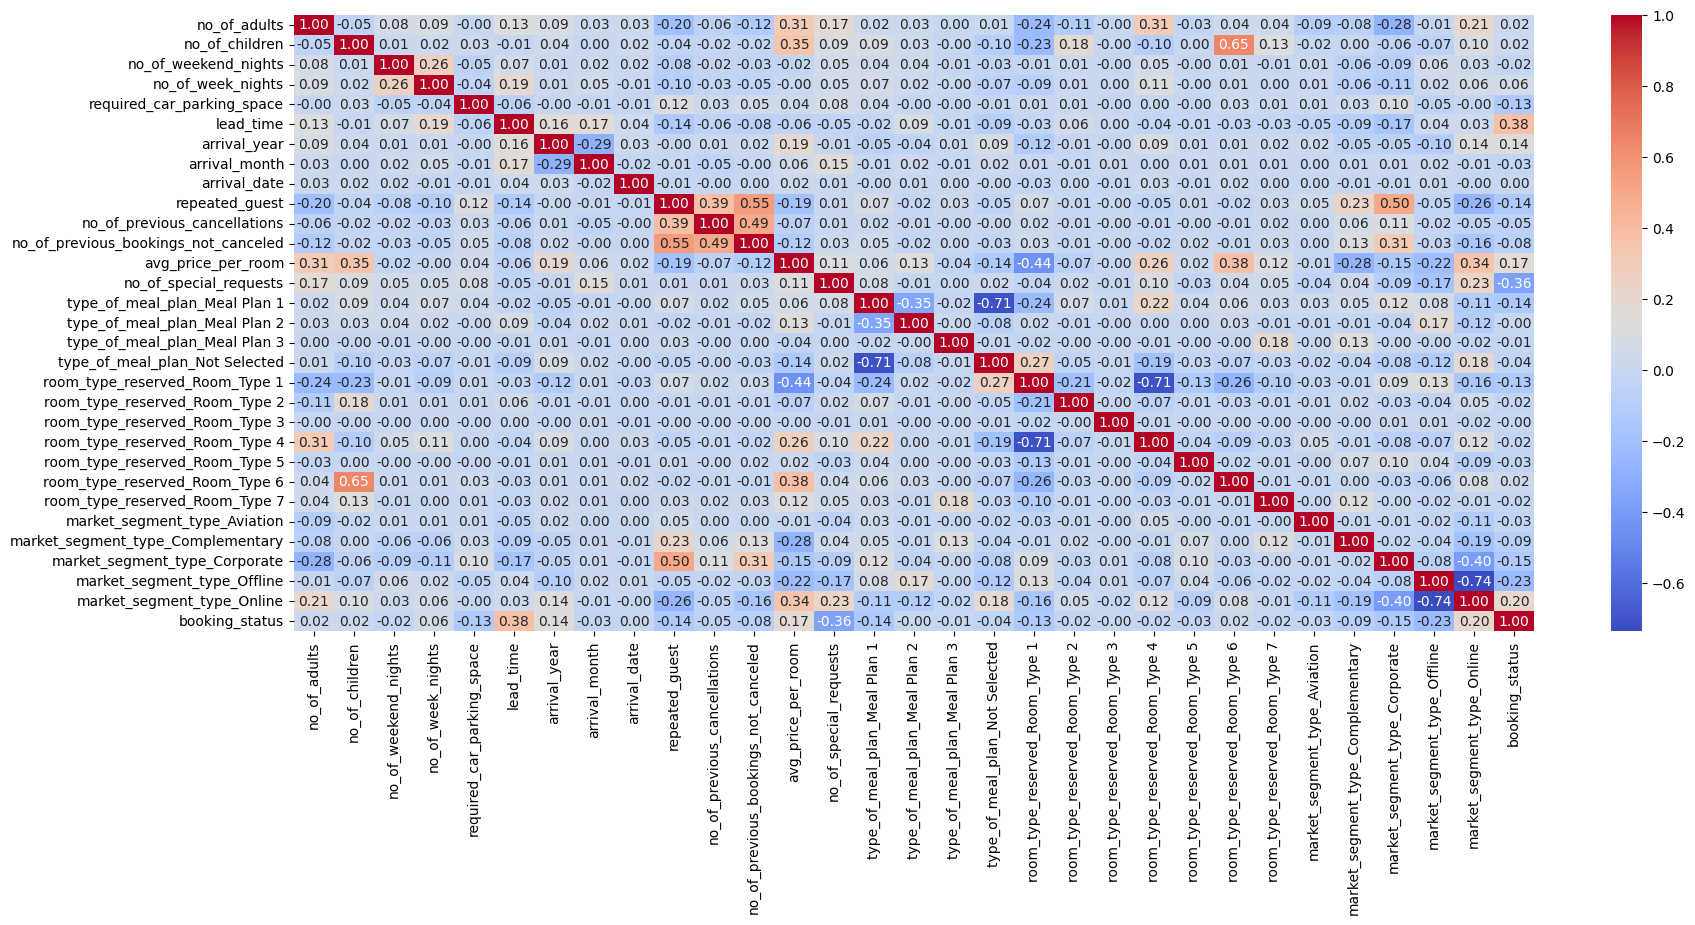

In [ ]:
plt.figure(figsize = (20, 8))

sns.heatmap(matriz_correlacao, annot = True,
            cmap = 'coolwarm', fmt = '.2f')

## Identificando as features significativas com machine learning 🔍

Uma das técnicas passíveis de serem utilizadas para a identificação das features importantes, que consigam explicar a variável target é utilizar o método `feature_importances_`, relativo ao modelo de machine learning ( bastante associado com modelos como Random Forest por exemplo ).

Por meio dela, é obtido um array com numeros que informam a intensidade ded contribuição para cada feature que a ele foi passada, durante o seu processo de aprendizado. Vejamos :

In [ ]:
# Treinando o modelo :

random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=22)

In [ ]:
# Verificando a importância por cada feature :

feature_importance = pd.DataFrame({'colunas' : X_train.columns, 'importancia' : random_forest.feature_importances_})

feature_importance.sort_values(by = 'importancia', ascending = False)

,colunas,importancia
13,no_of_special_requests,0.281566
5,lead_time,0.256008
28,market_segment_type_Offline,0.082932
12,avg_price_per_room,0.080593
7,arrival_month,0.055932
29,market_segment_type_Online,0.042983
14,type_of_meal_plan_Meal Plan 1,0.023331
27,market_segment_type_Corporate,0.020356
6,arrival_year,0.018578
17,type_of_meal_plan_Not Selected,0.015378


In [ ]:
# Verificando as 10 variáveis mais importantes :

feature_importance_10 = feature_importance.sort_values(by = 'importancia', ascending = False).head(10)
feature_importance_10

,colunas,importancia
13,no_of_special_requests,0.281566
5,lead_time,0.256008
28,market_segment_type_Offline,0.082932
12,avg_price_per_room,0.080593
7,arrival_month,0.055932
29,market_segment_type_Online,0.042983
14,type_of_meal_plan_Meal Plan 1,0.023331
27,market_segment_type_Corporate,0.020356
6,arrival_year,0.018578
17,type_of_meal_plan_Not Selected,0.015378


Analisando as features mais significativas para o modelo em seu processo de aprendizado, pode-se verificar que elas coincidem com as features que haviam apresentado maior correlação linear encontrada pela matriz de correlação.

Aliando essa identificação com a matriz citada, é possível aumentar a complexidade da análise no sentido de, além de identificar junto do modelo de machine learning as features que são mais importantes, entender qual o tipo de relação que elas apresentam em relação à variável target, se positiva ou negativa.

### Visualizando graficamente as variáveis mais importantes 🎴

<ipython-input-73-1b8fc0c688a6>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'no_of_special_requests'),
 Text(1, 0, 'lead_time'),
 Text(2, 0, 'market_segment_type_Offline'),
 Text(3, 0, 'avg_price_per_room'),
 Text(4, 0, 'arrival_month'),
 Text(5, 0, 'market_segment_type_Online'),
 Text(6, 0, 'type_of_meal_plan_Meal Plan 1'),
 Text(7, 0, 'market_segment_type_Corporate'),
 Text(8, 0, 'arrival_year'),
 Text(9, 0, 'type_of_meal_plan_Not Selected')]

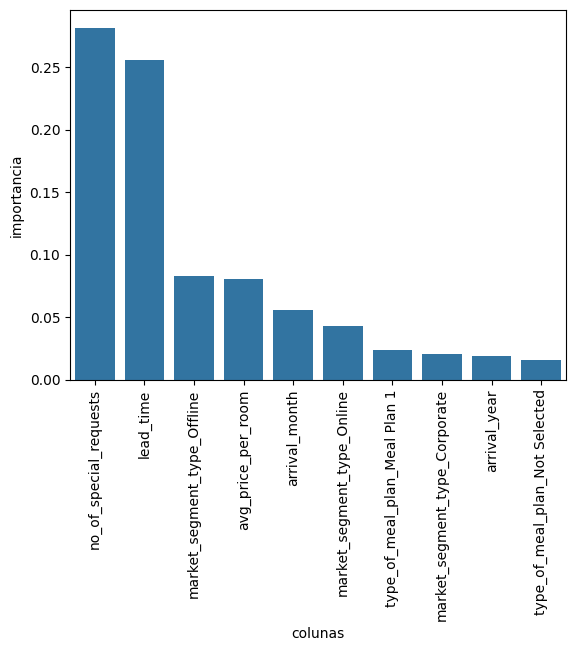

In [ ]:
# Visualizando graficamente as variáveis mais importantes :

ax = sns.barplot(x='colunas',y='importancia',data = feature_importance_10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Analisando algumas variáveis individualmente

<Axes: xlabel='booking_status', ylabel='lead_time'>

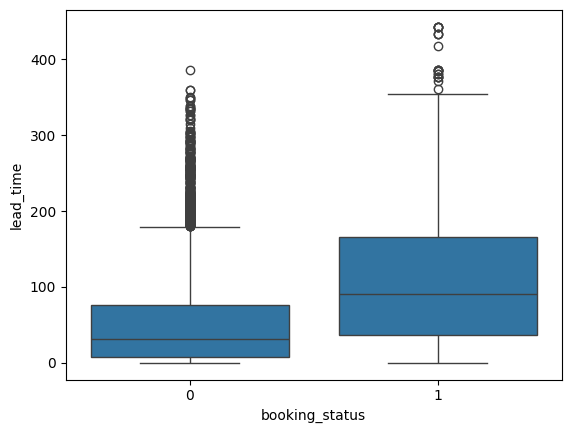

In [ ]:
sns.boxplot(X_train, x = y_train, y='lead_time')

Analisando individualmente a variável lead_time, que se refere ao tempo de reserva de um cliente para a reserva no hotel, pode-se compreender que os clientes que apresentam um tempo maior são mais propensos a efetivar a reserva do hotel, de modo que ocorre o oposto nos que apresentam um intervalo menor, porém com a presença significativa de outliers na proporção média dessa clase, o que pode indicar que há uma considerável parte de pessoas que cancelam a reserva depois dos 200 dias.

<Axes: xlabel='booking_status', ylabel='no_of_special_requests'>

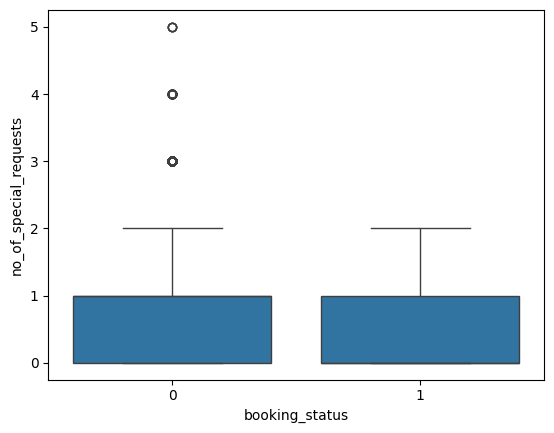

In [ ]:
sns.boxplot(X_train, x = y_train, y='no_of_special_requests')

Analisanddo esse gráfico de distribuição pode-se compreender que a distribuição média dos dados para os clientes que efetuam e cancelam a reserva é semelhante, diverginddo apenas na presença e na ausência de outliers.

A distribuição que se refere aos clientes que cancelam o serviço apresentam outliers acima do limite do número de requisitos especiais, indicando que clientes que realizam mais requisitos especiais tendem a apresentar maiores propensões a cancelar a reserva no hotel.

## Verificando a precisão do modelo utilizando apenas as features mais relevantes

In [ ]:
# Selecionando as features mais importantes

features = ['no_of_special_requests', 'lead_time', 'market_segment_type_Offline',
            'avg_price_per_room', 'arrival_month', 'market_segment_type_Online',
            'type_of_meal_plan_Meal Plan 1', 'market_segment_type_Corporate',
            'arrival_year', 'type_of_meal_plan_Not Selected']

In [ ]:
random_forest.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=22)

In [ ]:
y_predict = random_forest.predict(X_test[features])

acuracia = accuracy_score(y_test, y_predict).round(2)
precisao = precision_score(y_test, y_predict).round(2)
recall = recall_score(y_test, y_predict).round(2)
f1 = f1_score(y_test, y_predict).round(2)

print(f'Acurácia do modelo : {(acuracia)} ')
print(f'Precisão do modelo : {(precisao)} ')
print(f'Revocação do modelo : {(recall)} ')
print(f'F1-Score do modelo : {(f1)} ')


Acurácia do modelo : 0.86 
Precisão do modelo : 0.86 
Revocação do modelo : 0.83 
F1-Score do modelo : 0.84 


## Selecionando as features mais importantes automaticamente

Além das abordagens adotadas para a seleção das features, comumente se utiliza outros métodos mais robustos para tal atividade, como a redução da dimensionalidade recursiva, combinando-a com o com uma cross validação.

Uma vez que para a sua realização há um certo custo computacional, estarei deixando abaixo o link que informa como se dá a sua implementação.

https://cdn3.gnarususercontent.com.br/3071-classificacao-dados-multidimensionais/Dados+multidimensionais-Cheat+Sheet.pdf
